<a href="https://colab.research.google.com/github/Greqorian/Ebay_kleineanzeige_img_scraper/blob/main/Copy_of_IKEA_Products_Recognition_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

! [ -e /content ] && pip install -Uqq fastai  # upgrade fastai on colab

     |████████████████████████████████| 189 kB 9.0 MB/s 
     |████████████████████████████████| 55 kB 3.5 MB/s 


In [2]:
# package imports
#basics
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import json # json files

#visualisation
from matplotlib import pyplot as plt
#fastai
import torch
from fastai.vision.all import *
from fastai.vision.augment import *
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

import pickle


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
# Opening JSON file
f = open('/content/drive/MyDrive/DATA/furnitureImages/100-furniture/100-furniture-imagesList.json', "r")
# a dictionary
uniqueList = json.load(f)

In [15]:
df1 = pd.json_normalize(uniqueList)

In [16]:
os.chdir('/content/drive/MyDrive/DATA/furnitureImages/5-first-furnitureImages')

In [17]:
df1['index'] = df1.index

In [18]:
df1['title'] = df1['index'].astype(str) +'_'+ df1['id'] +'_'+ df1['title'] +'.jpg'
# df['title'] = df['title'].apply(lambda x: os.path.join(train_path, x))
df1

,id,name,title,category,group,subgroup,src,index
0,60510640,JÄRVFJÄLLET,0_60510640_JÄRVFJÄLLET_Office_chair_with_armrests.jpg,Furniture,Chairs,Desk chairs,https://www.ikea.com/us/en/images/products/jaervfjaellet-office-chair-with-armrests__1009906_pe827773_s5.jpg?f=xu,0
1,60510640,JÄRVFJÄLLET,1_60510640_JÄRVFJÄLLET_Office_chair_with_armrests.jpg,Furniture,Chairs,Desk chairs,https://www.ikea.com/us/en/images/products/jaervfjaellet-office-chair-with-armrests-grann-white__1078845_pe857303_s5.jpg?f=xu,1
2,60510640,JÄRVFJÄLLET,2_60510640_JÄRVFJÄLLET_Office_chair_with_armrests.jpg,Furniture,Chairs,Desk chairs,https://www.ikea.com/us/en/images/products/jaervfjaellet-office-chair-with-armrests__1009906_pe827773_s5.jpg?f=s,2
3,60510640,JÄRVFJÄLLET,3_60510640_JÄRVFJÄLLET_Office_chair_with_armrests.jpg,Furniture,Chairs,Desk chairs,https://www.ikea.com/us/en/images/products/jaervfjaellet-office-chair-with-armrests__1030806_pe836390_s5.jpg?f=s,3
4,60510640,JÄRVFJÄLLET,4_60510640_JÄRVFJÄLLET_Office_chair_with_armrests.jpg,Furniture,Chairs,Desk chairs,https://www.ikea.com/us/en/images/products/jaervfjaellet-office-chair-with-armrests__1030807_pe836391_s5.jpg?f=s,4
...,...,...,...,...,...,...,...,...
937,80388587,STRANDTORP,937_80388587_STRANDTORP_Extendable_table_-_brown_59-80_3-4-102_3-8x37_3-8_.jpg,Furniture,Tables & desks,Dining tables,https://www.ikea.com/us/en/images/products/strandtorp-extendable-table-brown__0949239_pe799601_s5.jpg?f=s,937
938,80388587,STRANDTORP,938_80388587_STRANDTORP_Extendable_table_-_brown_59-80_3-4-102_3-8x37_3-8_.jpg,Furniture,Tables & desks,Dining tables,https://www.ikea.com/us/en/images/products/strandtorp-extendable-table-brown__0946319_ph172862_s5.jpg?f=s,938
939,80388587,STRANDTORP,939_80388587_STRANDTORP_Extendable_table_-_brown_59-80_3-4-102_3-8x37_3-8_.jpg,Furniture,Tables & desks,Dining tables,https://www.ikea.com/us/en/images/products/strandtorp-extendable-table-brown__0946320_ph172863_s5.jpg?f=s,939
940,80388587,STRANDTORP,940_80388587_STRANDTORP_Extendable_table_-_brown_59-80_3-4-102_3-8x37_3-8_.jpg,Furniture,Tables & desks,Dining tables,https://www.ikea.com/us/en/images/products/strandtorp-extendable-table-brown__0946321_ph172866_s5.jpg?f=s,940


In [9]:
df1 = df1.drop(columns=['id', 'category', 'group', 'subgroup', 'src', 'index'])
df1 = df1[['title', 'name' ]]
df1

,title,name
0,0_60510640_JÄRVFJÄLLET_Office_chair_with_armrests.jpg,JÄRVFJÄLLET
1,1_60510640_JÄRVFJÄLLET_Office_chair_with_armrests.jpg,JÄRVFJÄLLET
2,2_60510640_JÄRVFJÄLLET_Office_chair_with_armrests.jpg,JÄRVFJÄLLET
3,3_60510640_JÄRVFJÄLLET_Office_chair_with_armrests.jpg,JÄRVFJÄLLET
4,4_60510640_JÄRVFJÄLLET_Office_chair_with_armrests.jpg,JÄRVFJÄLLET
...,...,...
942,942_80388587_STRANDTORP_Extendable_table_-_brown_59-80_3-4-102_3-8x37_3-8_.jpg,STRANDTORP
943,943_80388587_STRANDTORP_Extendable_table_-_brown_59-80_3-4-102_3-8x37_3-8_.jpg,STRANDTORP
944,944_80388587_STRANDTORP_Extendable_table_-_brown_59-80_3-4-102_3-8x37_3-8_.jpg,STRANDTORP
945,945_80388587_STRANDTORP_Extendable_table_-_brown_59-80_3-4-102_3-8x37_3-8_.jpg,STRANDTORP


In [ ]:
print(df.head(5)[df.columns[0:4]])
path = '/content/drive/MyDrive/DATA/furnitureImages/5-first-furnitureImages'
train_path = '/content/drive/MyDrive/DATA/furnitureImages/5-first-furnitureImages/train'

                                                   title         name
0  0_60510640_JÄRVFJÄLLET_Office_chair_with_armrests.jpg  JÄRVFJÄLLET
1  1_60510640_JÄRVFJÄLLET_Office_chair_with_armrests.jpg  JÄRVFJÄLLET
2  2_60510640_JÄRVFJÄLLET_Office_chair_with_armrests.jpg  JÄRVFJÄLLET
3  3_60510640_JÄRVFJÄLLET_Office_chair_with_armrests.jpg  JÄRVFJÄLLET
4  4_60510640_JÄRVFJÄLLET_Office_chair_with_armrests.jpg  JÄRVFJÄLLET


In [ ]:
img_size = 128
augmentations = [
        Rotate(10, p=0.4, mode='bilinear'), 
        Brightness(max_lighting=0.3,p=0.5),
        Contrast(max_lighting=0.4, p=0.5),
        RandomErasing(p=0.3, sl=0.0, sh=0.2, min_aspect=0.3, max_count=1),
        Flip(p=0.5),
        Zoom(max_zoom=1,p=0.5),
        RandomResizedCrop(img_size)
    ]
dls = ImageDataLoaders.from_df(df=df,
                               path=path,
                               folder='train',
                               valid_pct = 0.2, 
                               bs = 30, 
                               device=device, 
                               num_workers=0, 
                               batch_tfms=augmentations, 
                               item_tfms=Resize(img_size))

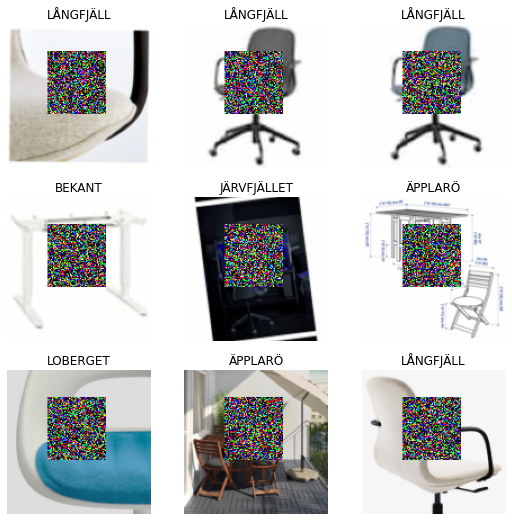

In [ ]:
dls.show_batch()

In [ ]:
learn = cnn_learner(dls, 
                    resnet34, 
                    metrics=[accuracy,error_rate])

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

SuggestedLRs(valley=0.0020892962347716093)

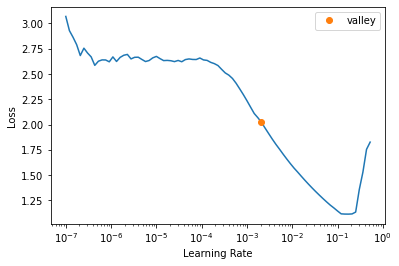

In [ ]:
learn.lr_find()

In [ ]:
learn.fine_tune(10)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,2.662405,5.352548,0.142857,0.857143,00:06


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,2.834671,4.247798,0.142857,0.857143,00:05
1,2.585132,3.575861,0.285714,0.714286,00:05
2,2.539659,2.760198,0.428571,0.571429,00:05
3,2.336087,1.904993,0.428571,0.571429,00:05
4,2.003107,1.430465,0.571429,0.428571,00:05
5,1.726327,1.194583,0.714286,0.285714,00:05
6,1.498111,1.104843,0.714286,0.285714,00:05
7,1.391121,1.044631,0.714286,0.285714,00:05
8,1.241754,0.968738,0.571429,0.428571,00:05
9,1.142990,0.984135,0.571429,0.428571,00:05


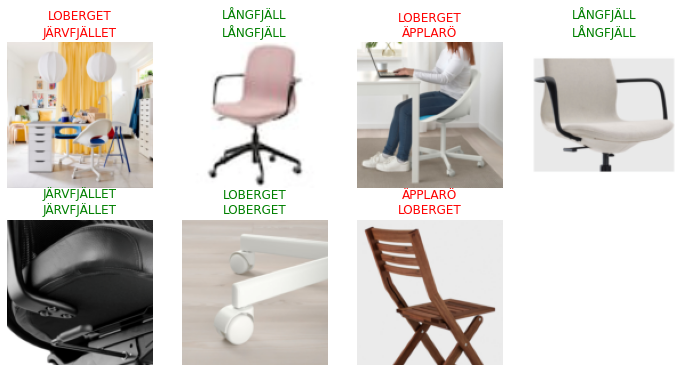

In [ ]:
learn.show_results()

# Research 2

In [ ]:
# Opening JSON file
f = open('/content/drive/MyDrive/DATA/furnitureImages/30-furniture/ebayImagesList.json', "r")
# a dictionary
uniqueList2 = json.load(f)

In [ ]:
df2 = pd.json_normalize(uniqueList2)

In [ ]:
df3 = df.append(df2)

In [ ]:
# print(len(df))
print(len(df2))
# print(len(df3))

3660


In [ ]:
df2

,title,name
0,0_60510640_JÄRVFJÄLLET_ebay.jpg,JÄRVFJÄLLET
1,1_60510640_JÄRVFJÄLLET_ebay.jpg,JÄRVFJÄLLET
2,2_60510640_JÄRVFJÄLLET_ebay.jpg,JÄRVFJÄLLET
3,3_60510640_JÄRVFJÄLLET_ebay.jpg,JÄRVFJÄLLET
4,4_60510640_JÄRVFJÄLLET_ebay.jpg,JÄRVFJÄLLET
...,...,...
3655,7_39252346_LÅNGFJÄLL_ebay.jpg,LÅNGFJÄLL
3656,8_39252346_LÅNGFJÄLL_ebay.jpg,LÅNGFJÄLL
3657,9_39252346_LÅNGFJÄLL_ebay.jpg,LÅNGFJÄLL
3658,10_39252346_LÅNGFJÄLL_ebay.jpg,LÅNGFJÄLL


In [ ]:
path = '/content/drive/MyDrive/DATA/furnitureImages/30-furniture'
train_path = '/content/drive/MyDrive/DATA/furnitureImages/30-furniture/train'

In [ ]:
dls = ImageDataLoaders.from_df(df=df2,
                               path=path,
                               folder='train',
                               valid_pct = 0.2, 
                               bs = 30, 
                               device=device, 
                               num_workers=0, 
                               item_tfms=Resize(460), 
                               batch_tfms=aug_transforms(size=224)
                              )

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1051: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:766.)
  ret = func(*args, **kwargs)


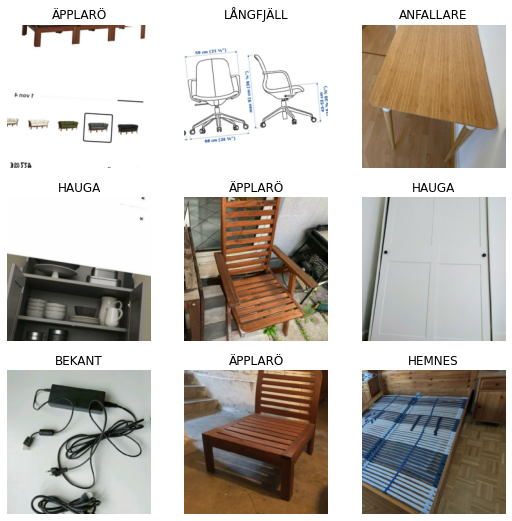

In [ ]:
dls.show_batch()

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

SuggestedLRs(valley=0.0012022644514217973)

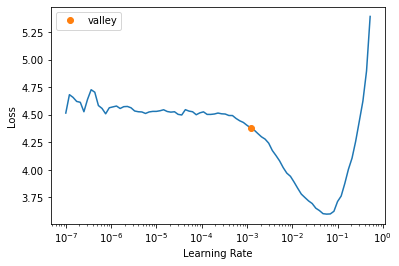

In [ ]:
learn = cnn_learner(dls, 
                    resnet34, 
                    metrics=[accuracy,error_rate])
learn.lr_find()

In [ ]:
learn.fine_tune(epochs=5,base_lr=0.003)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,2.397469,0.973831,0.710383,0.289617,22:43


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.136789,0.503137,0.863388,0.136612,28:08
1,0.861363,0.404943,0.866120,0.133880,27:54
2,0.524490,0.234253,0.919399,0.080601,27:58
3,0.303722,0.156306,0.949454,0.050546,27:53
4,0.192701,0.134422,0.953552,0.046448,28:07


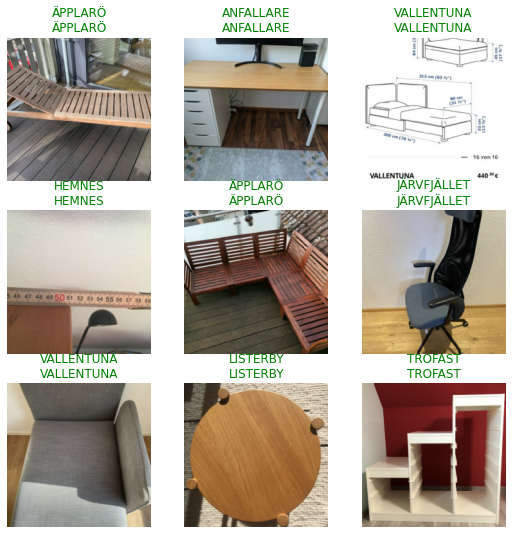

In [ ]:
learn.show_results()


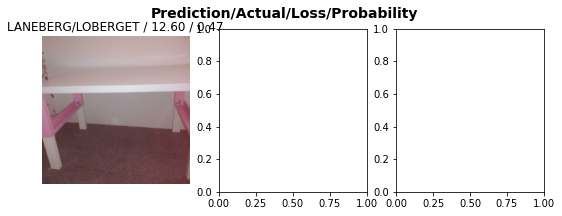

In [ ]:
interp = Interpretation.from_learner(learn)
interp.plot_top_losses(3)

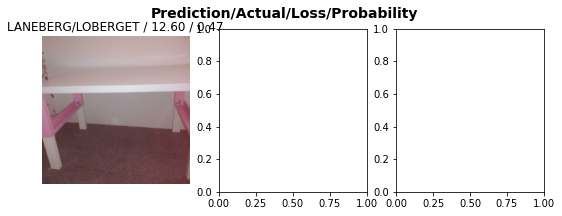

In [ ]:
interp.plot_top_losses(3)

In [ ]:
!pwd

/content


In [ ]:
os.chdir('/content/drive/MyDrive/DATA/furnitureImages/30-furniture')

In [ ]:
learn.export('30items_model_.pkl')

In [ ]:
os.chdir('/content/drive/MyDrive/DATA')

# Research 3 

In [ ]:
# Opening JSON file
f = open('/content/drive/MyDrive/DATA/furnitureImages/100-furniture/ebayImagesList.json', "r")
# a dictionary
uniqueList3 = json.load(f)

In [ ]:
# print(len(df1))
df3 = pd.json_normalize(uniqueList3)
# dfResult = df1.append(df3)
print(len(df3))
#print(len(dfResult))


10192


In [ ]:
print(df3)

                                 title         name
0      0_60510640_JÄRVFJÄLLET_ebay.jpg  JÄRVFJÄLLET
1      1_60510640_JÄRVFJÄLLET_ebay.jpg  JÄRVFJÄLLET
2      2_60510640_JÄRVFJÄLLET_ebay.jpg  JÄRVFJÄLLET
3      3_60510640_JÄRVFJÄLLET_ebay.jpg  JÄRVFJÄLLET
4      4_60510640_JÄRVFJÄLLET_ebay.jpg  JÄRVFJÄLLET
...                                ...          ...
10187      153_99830594_POÄNG_ebay.jpg        POÄNG
10188      154_99830594_POÄNG_ebay.jpg        POÄNG
10189      155_99830594_POÄNG_ebay.jpg        POÄNG
10190      156_99830594_POÄNG_ebay.jpg        POÄNG
10191      157_99830594_POÄNG_ebay.jpg        POÄNG

[10192 rows x 2 columns]


In [ ]:
path2 = '/content/drive/MyDrive/DATA/furnitureImages/100-furniture/'
train_path = '/content/drive/MyDrive/DATA/furnitureImages/100-furniture/train'

In [ ]:
dls2 = ImageDataLoaders.from_df(df=df3,
                               path=path2,
                               folder='train',
                               valid_pct = 0.2, 
                               bs = 30, 
                               device=device, 
                               num_workers=0, 
                               item_tfms=Resize(460), 
                               batch_tfms=aug_transforms(size=224)
                              )

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1051: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:766.)
  ret = func(*args, **kwargs)


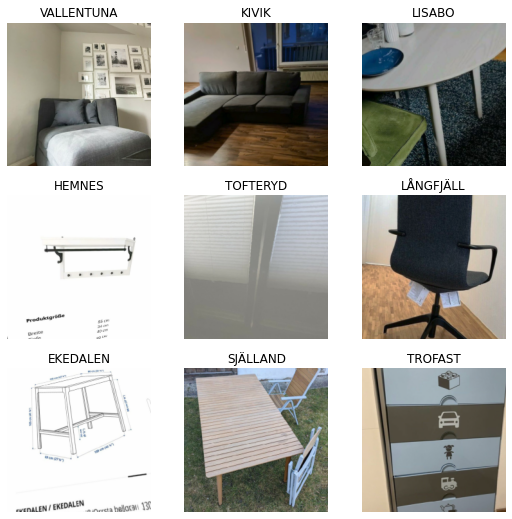

In [ ]:
dls2.show_batch()

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

SuggestedLRs(valley=0.0012022644514217973)

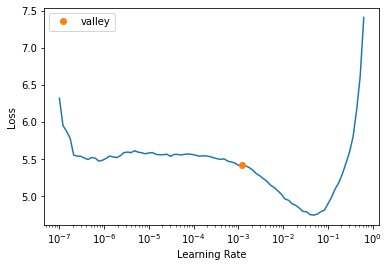

In [ ]:
learn = cnn_learner(dls2, 
                    resnet34, 
                    metrics=[accuracy,error_rate])
learn.lr_find()

In [ ]:
learn.fine_tune(epochs=6,base_lr=0.003)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,2.280327,1.359012,0.631501,0.368499,1:30:56


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.177174,0.684562,0.811580,0.188420,1:24:12
1,0.953232,0.661048,0.814524,0.185476,1:25:38
2,0.698789,0.394194,0.892542,0.107458,1:26:30
3,0.392951,0.285529,0.919529,0.080471,1:26:10


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.177174,0.684562,0.811580,0.188420,1:24:12
1,0.953232,0.661048,0.814524,0.185476,1:25:38
2,0.698789,0.394194,0.892542,0.107458,1:26:30
3,0.392951,0.285529,0.919529,0.080471,1:26:10
4,0.208894,0.215240,0.942591,0.057409,1:25:35
5,0.153199,0.206773,0.948970,0.051030,1:25:43


In [ ]:
os.chdir('/content/drive/MyDrive/DATA/furnitureImages/100-furniture')

In [ ]:
learn.export('100items_model_.pkl')

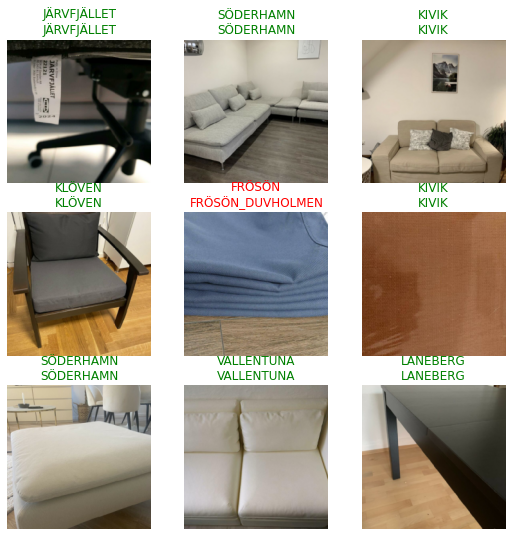

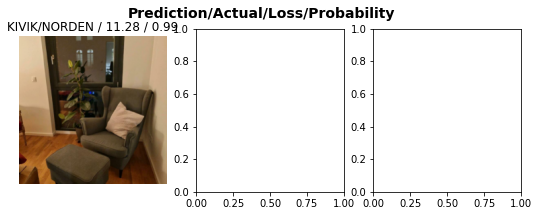

In [ ]:
learn.show_results()
interp = Interpretation.from_learner(learn)
interp.plot_top_losses(3)

In [ ]:
interp.plot_top_losses(3)

# Reseaerch 4 : 30 pictures 

In [ ]:
# Opening JSON file
f = open('/content/drive/MyDrive/DATA/furnitureImages/100-furniture/100-furniture-imagesList.json', "r")
# a dictionary
df2 = json.load(f)

In [19]:
os.chdir('/content/drive/MyDrive/DATA/furnitureImages/100-furniture')

In [ ]:
df2['index'] = df2.index


In [ ]:
df1 = df1.drop(columns=['id', 'category', 'group', 'subgroup', 'index'])
df1 = df1[['title', 'name' ]]
df1

In [20]:
print(df1.head(5)[df1.columns[0:4]])
path = '/content/drive/MyDrive/DATA/furnitureImages/100-first-furnitureImages'
train_path = '/content/drive/MyDrive/DATA/furnitureImages/100-first-furnitureImages/trainSmall'

         id         name  \
0  60510640  JÄRVFJÄLLET   
1  60510640  JÄRVFJÄLLET   
2  60510640  JÄRVFJÄLLET   
3  60510640  JÄRVFJÄLLET   
4  60510640  JÄRVFJÄLLET   

                                                   title   category  
0  0_60510640_JÄRVFJÄLLET_Office_chair_with_armrests.jpg  Furniture  
1  1_60510640_JÄRVFJÄLLET_Office_chair_with_armrests.jpg  Furniture  
2  2_60510640_JÄRVFJÄLLET_Office_chair_with_armrests.jpg  Furniture  
3  3_60510640_JÄRVFJÄLLET_Office_chair_with_armrests.jpg  Furniture  
4  4_60510640_JÄRVFJÄLLET_Office_chair_with_armrests.jpg  Furniture  


In [21]:
dls2 = ImageDataLoaders.from_df(df=df1,
                               path=path,
                               folder='train',
                               valid_pct = 0.2, 
                               bs = 30, 
                               device=device, 
                               num_workers=0, 
                               item_tfms=Resize(460), 
                               batch_tfms=aug_transforms(size=224)
                              )
learn = cnn_learner(dls2, 
                    resnet34, 
                    metrics=[accuracy,error_rate])
learn.lr_find()


FileNotFoundError: ignored